In [82]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/animal-dataset.zip' -d '/content/drive/MyDrive/animal-dataset'

In [2]:
import os
import numpy as np
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import matplotlib

In [ ]:
print("Tensorflow version: " + tf.__version__)
print("NumPy version: " + np.__version__)
print("Keras version: " + keras.__version__)
print("Matplotlib version: " + matplotlib.__version__)

Tensorflow version: 2.15.0
NumPy version: 1.25.2
Keras version: 2.15.0
Matplotlib version: 3.7.1


In [79]:

image_size = (224, 224)
batch_size = 32

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/animal-dataset/dataset',
    validation_split=0.2,
    subset='training',

    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=13
)
val_ds = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/animal-dataset/dataset',
    validation_split=0.2,
    subset='validation',

    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,
    seed=13
)

class_names = train_ds.class_names
print(class_names)
for data, labels in train_ds.take(1):
    print(data.shape)
    print(labels.shape)


Found 1400 files belonging to 4 classes.
Using 1120 files for training.
Found 1400 files belonging to 4 classes.
Using 280 files for validation.
['bear', 'elephant', 'leopard', 'zebra']
(32, 224, 224, 3)
(32,)


# **Effect of different learning rates on baseline ConvNeXt Model**

Fit model on training data
Epoch 1/10
35/35 [==============================] - 68s 855ms/step - loss: 2.5684 - accuracy: 0.2795 - val_loss: 1.6235 - val_accuracy: 0.0857
Epoch 2/10
35/35 [==============================] - 27s 743ms/step - loss: 1.4755 - accuracy: 0.3295 - val_loss: 1.3134 - val_accuracy: 0.4393
Epoch 3/10
35/35 [==============================] - 27s 737ms/step - loss: 1.3526 - accuracy: 0.3634 - val_loss: 1.4342 - val_accuracy: 0.1929
Epoch 4/10
35/35 [==============================] - 27s 738ms/step - loss: 1.2557 - accuracy: 0.3946 - val_loss: 1.5961 - val_accuracy: 0.2071
Epoch 5/10
35/35 [==============================] - 27s 742ms/step - loss: 1.1999 - accuracy: 0.4464 - val_loss: 0.9675 - val_accuracy: 0.7143
Epoch 6/10
35/35 [==============================] - 28s 757ms/step - loss: 1.0481 - accuracy: 0.5357 - val_loss: 0.9882 - val_accuracy: 0.5000
Epoch 7/10
35/35 [==============================] - 27s 742ms/step - loss: 1.0113 - accuracy: 0.5571 - val_loss: 0.

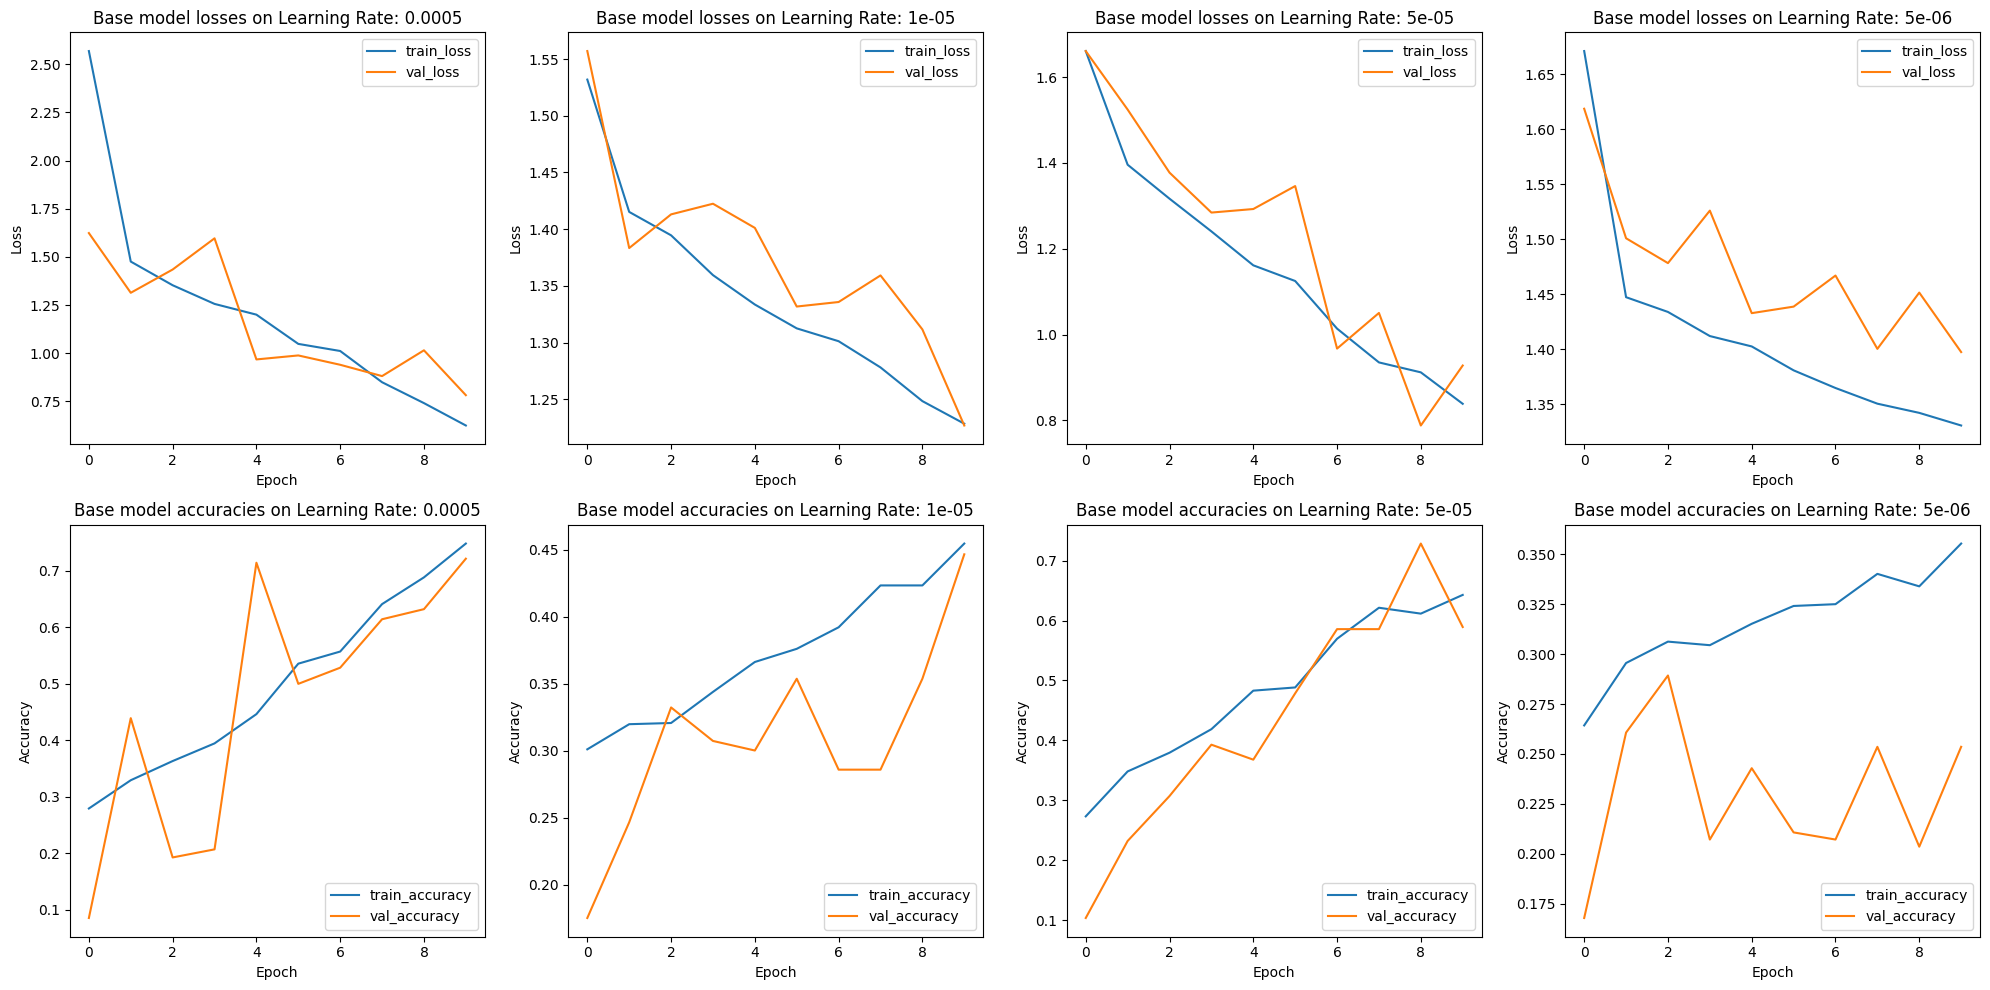

In [ ]:
lr_list = [5e-4, 1e-5, 5e-5, 5e-6]


fig, axs = plt.subplots(2, len(lr_list), figsize=(20, 10))

for i, lr in enumerate(lr_list):
    model = keras.applications.ConvNeXtTiny(
      model_name='convnext_tiny',
      include_top=True,
      include_preprocessing=True,
      weights=None,
      classes=4
    )
    model.compile(
        optimizer=keras.optimizers.AdamW(learning_rate=lr),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    print("Fit model on training data")
    history = model.fit(
        train_ds,
        epochs=10,
        validation_data=val_ds
    )

    # Plot loss
    axs[0, i].plot(history.history['loss'], label='train_loss')
    axs[0, i].plot(history.history['val_loss'], label='val_loss')
    axs[0, i].set_xlabel('Epoch')
    axs[0, i].set_ylabel('Loss')
    axs[0, i].set_title(f'Base model losses on Learning Rate: {lr}')
    axs[0, i].legend(loc='upper right')

    # Plot accuracy
    axs[1, i].plot(history.history['accuracy'], label='train_accuracy')
    axs[1, i].plot(history.history['val_accuracy'], label='val_accuracy')
    axs[1, i].set_xlabel('Epoch')
    axs[1, i].set_ylabel('Accuracy')
    axs[1, i].set_title(f'Base model accuracies on Learning Rate: {lr}')
    axs[1, i].legend(loc='lower right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

*   The reason behind I choose the learning rate around 1e-5 is that the original paper of ConvNeXt states that the model is trained on 5e-5.
*   I chose 4 different lr for 10 epochs and it seems 5e-4 is the best one.
*   Due to GPU constraints I couldn't train the model over 10 epochs but by looking at the trend of the loss and accuracy, it can be said that there is room to improve if epoch number was increased.



# **Effect of data augmentation on baseline ConvNeXt Model**

Fit model on training data
Epoch 1/10
35/35 [==============================] - 69s 888ms/step - loss: 2.7291 - accuracy: 0.2598 - val_loss: 1.4012 - val_accuracy: 0.0857
Epoch 2/10
35/35 [==============================] - 26s 723ms/step - loss: 1.4960 - accuracy: 0.2902 - val_loss: 1.3730 - val_accuracy: 0.2393
Epoch 3/10
35/35 [==============================] - 27s 726ms/step - loss: 1.4462 - accuracy: 0.2759 - val_loss: 1.5148 - val_accuracy: 0.2464
Epoch 4/10
35/35 [==============================] - 27s 734ms/step - loss: 1.4033 - accuracy: 0.3232 - val_loss: 1.4221 - val_accuracy: 0.1786
Epoch 5/10
35/35 [==============================] - 26s 722ms/step - loss: 1.3291 - accuracy: 0.3527 - val_loss: 1.2064 - val_accuracy: 0.5214
Epoch 6/10
35/35 [==============================] - 26s 724ms/step - loss: 1.2877 - accuracy: 0.3982 - val_loss: 1.1270 - val_accuracy: 0.5893
Epoch 7/10
35/35 [==============================] - 27s 736ms/step - loss: 1.2325 - accuracy: 0.4464 - val_loss: 1.

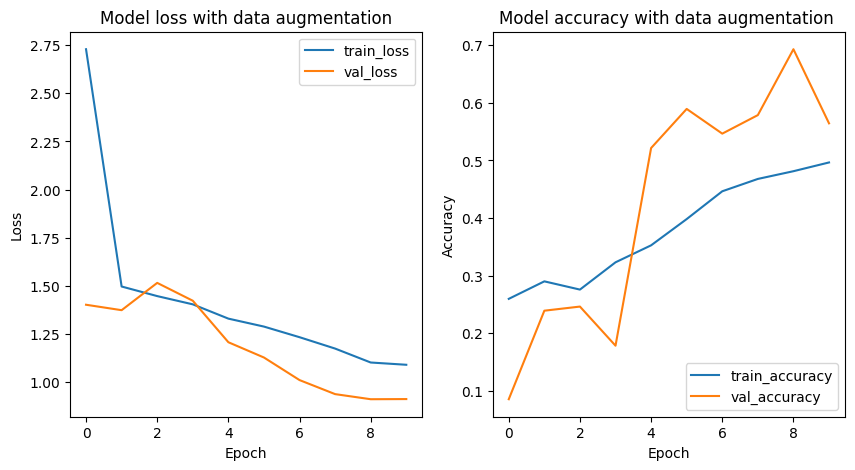

In [80]:
model = keras.applications.ConvNeXtTiny(
      model_name='convnext_tiny',
      include_top=True,
      include_preprocessing=True,
      weights=None,
      classes=4
    )

data_augmentation = keras.Sequential([
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
])


model_w_data_aug = keras.Sequential([
    data_augmentation,
    model
])
model_w_data_aug.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=5e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

print("Fit model on training data")
history = model_w_data_aug.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(history.history['loss'], label='train_loss')
axs[0].plot(history.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title(f'Model loss with data augmentation')
axs[0].legend(loc='upper right')

# Plot accuracy
axs[1].plot(history.history['accuracy'], label='train_accuracy')
axs[1].plot(history.history['val_accuracy'], label='val_accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title(f'Model accuracy with data augmentation ')
axs[1].legend(loc='lower right')

Accuracy didn't improved according to baseline model:


*   Baseline max val accuracy with lr=5e-4 : 0.72
*   Baseline+aug max val accuracy with lr=5e-4 : 0.69

I believe data augmentation made data complex so it is slower to converge. If the experimentation made on more epochs, it is likely that the accuracy would improved.



# **Effect of transfer learning on baseline ConvNeXt Model**

Before I explain the results of transfer learning with ConvNeXt, I must point out that, I believe choice of model was a bit wrong for this homework. When I selecting the network, I looked for the top-1 and top-5 model accuracies of ImageNet, and though it would be cool to choose the best one. But since it has only one FC at the end of the network, training of the transferred model was a bit easy and non-exciting.

In [66]:
base_model = keras.applications.ConvNeXtTiny(
      model_name='convnext_tiny',
      include_top=False,
      include_preprocessing=True,
      weights='imagenet'
    )

In [61]:
base_model.summary(show_trainable=True)


Model: "convnext_tiny"
_____________________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  Trainable  
 input_23 (InputLayer)       [(None, None, None, 3)]      0         []                            Y          
                                                                                                             
 convnext_tiny_prestem_norm  (None, None, None, 3)        0         ['input_23[0][0]']            Y          
 alization (Normalization)                                                                                   
                                                                                                             
 convnext_tiny_stem (Sequen  (None, None, None, 96)       4896      ['convnext_tiny_prestem_nor   Y          
 tial)                                                              malization[0][0]']           

In [67]:
base_model.trainable = False


In [68]:
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)

outputs = keras.layers.Dense(4)(x)
model_transfer = keras.Model(inputs, outputs)

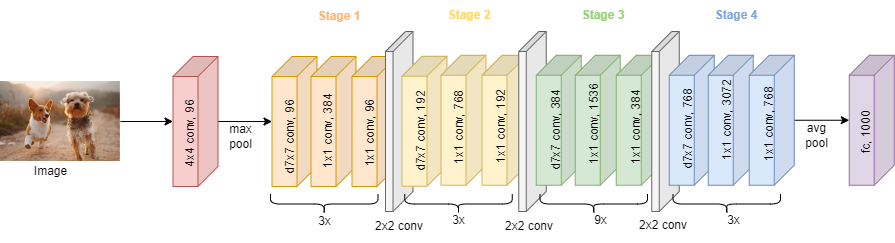

ConvNeXt has only one dense layer at the end, which is the classification layer.

Below, I run two experiments where I:


*   Excluded the dense layer, froze all the network, add a dense layer, and train.
*   Excluded the dense layer, froze all the network except the last layer normalization layer(see model summary), add a dense layer, and train.

In a way, it can be said that I finetuned the model in the second experiment. I expected meaningful improvements in this experiment, but, because of the number of epochs being low, I couldn't report the full potential of fine-tuning.



Epoch 1/10
35/35 [==============================] - 41s 440ms/step - loss: 3.1714 - accuracy: 0.4946 - val_loss: 0.7532 - val_accuracy: 0.8893
Epoch 2/10
35/35 [==============================] - 12s 310ms/step - loss: 0.6884 - accuracy: 0.8170 - val_loss: 0.1333 - val_accuracy: 0.9857
Epoch 3/10
35/35 [==============================] - 12s 319ms/step - loss: 0.5597 - accuracy: 0.8384 - val_loss: 0.3695 - val_accuracy: 0.9679
Epoch 4/10
35/35 [==============================] - 12s 311ms/step - loss: 0.6023 - accuracy: 0.8554 - val_loss: 0.4724 - val_accuracy: 0.9571
Epoch 5/10
35/35 [==============================] - 12s 308ms/step - loss: 0.5896 - accuracy: 0.8598 - val_loss: 0.3857 - val_accuracy: 0.9679
Epoch 6/10
35/35 [==============================] - 12s 314ms/step - loss: 0.5813 - accuracy: 0.8562 - val_loss: 0.3579 - val_accuracy: 0.9786
Epoch 7/10
35/35 [==============================] - 12s 317ms/step - loss: 0.5710 - accuracy: 0.8554 - val_loss: 0.3565 - val_accuracy: 0.9786

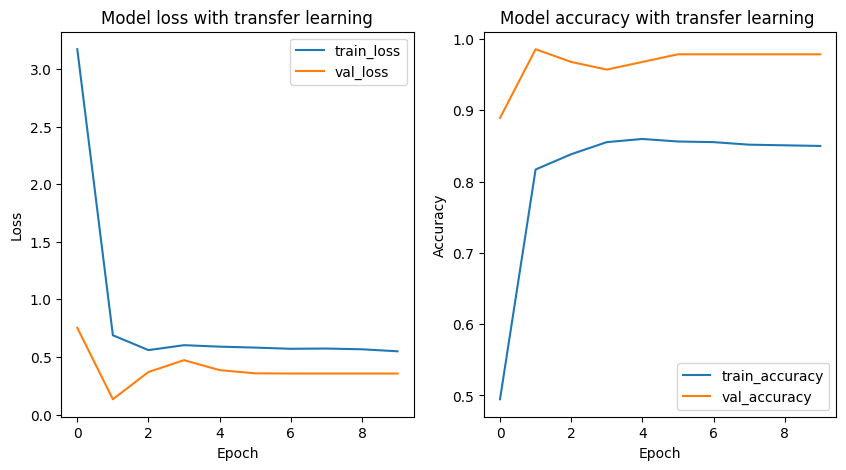

In [69]:
model_transfer.compile(optimizer=keras.optimizers.AdamW(5e-4),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
             )

history = model_transfer.fit(train_ds, epochs=10, validation_data=val_ds)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(history.history['loss'], label='train_loss')
axs[0].plot(history.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title(f'Model loss with transfer learning')
axs[0].legend(loc='upper right')

# Plot accuracy
axs[1].plot(history.history['accuracy'], label='train_accuracy')
axs[1].plot(history.history['val_accuracy'], label='val_accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title(f'Model accuracy with transfer learning ')
axs[1].legend(loc='lower right')

In [56]:
base_model = keras.applications.ConvNeXtTiny(
      model_name='convnext_tiny',
      include_top=False,
      include_preprocessing=True,
      weights='imagenet'
    )

In [57]:
for layer in base_model.layers[:-1]:
  layer.trainable = False

In [58]:
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs) #, training=False
x = keras.layers.GlobalAveragePooling2D()(x)

outputs = keras.layers.Dense(4)(x)
model_transfer = keras.Model(inputs, outputs)

Epoch 1/10
35/35 [==============================] - 26s 441ms/step - loss: 4.9510 - accuracy: 0.3732 - val_loss: 1.0590 - val_accuracy: 0.9107
Epoch 2/10
35/35 [==============================] - 12s 320ms/step - loss: 4.7034 - accuracy: 0.4670 - val_loss: 1.0442 - val_accuracy: 0.9107
Epoch 3/10
35/35 [==============================] - 12s 320ms/step - loss: 4.5794 - accuracy: 0.4884 - val_loss: 0.7019 - val_accuracy: 0.9714
Epoch 4/10
35/35 [==============================] - 12s 312ms/step - loss: 3.6475 - accuracy: 0.4982 - val_loss: 0.1523 - val_accuracy: 0.9786
Epoch 5/10
35/35 [==============================] - 12s 313ms/step - loss: 1.0953 - accuracy: 0.5312 - val_loss: 0.1396 - val_accuracy: 0.9714
Epoch 6/10
35/35 [==============================] - 12s 311ms/step - loss: 0.7603 - accuracy: 0.6670 - val_loss: 0.2021 - val_accuracy: 0.9714
Epoch 7/10
35/35 [==============================] - 12s 313ms/step - loss: 0.6769 - accuracy: 0.7179 - val_loss: 0.2184 - val_accuracy: 0.9714

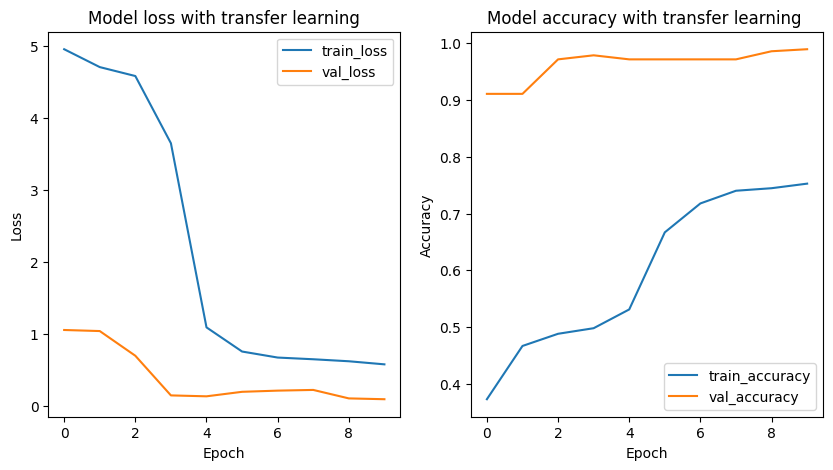

In [59]:
model_transfer.compile(optimizer=keras.optimizers.AdamW(1e-4),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
             )

history = model_transfer.fit(train_ds, epochs=10, validation_data=val_ds)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(history.history['loss'], label='train_loss')
axs[0].plot(history.history['val_loss'], label='val_loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title(f'Model loss with transfer learning')
axs[0].legend(loc='upper right')

# Plot accuracy
axs[1].plot(history.history['accuracy'], label='train_accuracy')
axs[1].plot(history.history['val_accuracy'], label='val_accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title(f'Model accuracy with transfer learning ')
axs[1].legend(loc='lower right')